#**Sarcasm Detection**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='/content/drive/MyDrive/sarcasm detection/Movie sarcasm Final Dataset.xlsx'

In [4]:
import pandas as pd
df = pd.read_excel(file_path)

In [5]:
df

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


# **STEP - 1) Data Cleaning**

## Methods Used
- Removing Duplicates
- Handling Null Values
- Removing Extra White Spaces
- Standardizing Text Case
- Relabeling Data
- Removing HTML Tags
- Removing Unwanted Punctuation


In [6]:
import matplotlib.pyplot as plt

In [7]:
# The size of the dataset
df.shape
rows=df.shape[0]
print(f"no.of datapoints {rows}")

#checking for null values
rows_with_nulls = df[df.isnull().any(axis=1)]
df = df.dropna() #droping the null value rows

df

no.of datapoints 6544


,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


In [9]:
df['Sarcasm'].value_counts()

Sarcasm
Sarcastic         3531
Not Sarcastic     1060
Not sarcastic      918
Non-Sarcastic      892
not Sarcastic       62
Non-sarcastic       30
non-sarcastic       16
sarcastic           14
Non-Sarcastic        3
Sarcasm              2
Non-sarcasm          1
nsa                  1
Sarcastic            1
Name: count, dtype: int64

In [10]:
df['Sentiment'].value_counts()

Sentiment
Negative     2786
positive     1471
negative     1426
Positive      833
Neutral        13
Nositive        1
Negative        1
Name: count, dtype: int64

In [11]:
#converting all the uppercases to lower cases in labels columns
df[['Sarcasm', 'Sentiment']]
df['Sarcasm'] = df['Sarcasm'].str.lower()
df['Sentiment'] = df['Sentiment'].str.lower()

# replacing all the labels to sarcastic and not sarcastic
df['Sarcasm'] = df['Sarcasm'].str.strip()
df['Sarcasm'] = df['Sarcasm'].replace({
    'sarcasm': 'sarcastic',
    'saracstic': 'sarcastic',
    'not sarcasm': 'not sarcastic',
    'non sarcasm': 'not sarcastic',
    'not-sarcasm': 'not sarcastic',
    'non-sarcasm' : 'not sarcastic',
    'non-sarcastic' : 'not sarcastic',
    'nsa': 'not sarcastic'
})

# replacing all the labels to positive and negative
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment'] = df['Sentiment'].replace({
    'negative': 'negative',
    'positive': 'positive',
    'neutral': 'neutral',
    'nositive': 'positive'
})

# removing the duplicates
df = df.drop_duplicates(subset='Review' , keep ='first')

no.of rows dropped 47
(6497, 3)


<ipython-input-11-8a456d4c13a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].str.lower()
<ipython-input-11-8a456d4c13a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].str.lower()
<ipython-input-11-8a456d4c13a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [12]:
df

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,positive,not sarcastic
1,A wonderful little production. <br /><br />The...,positive,not sarcastic
2,This movie was a groundbreaking experience!<br...,positive,sarcastic
3,I thought this was a wonderful way to spend ti...,positive,not sarcastic
4,Basically there's a family where a little boy ...,negative,sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,negative,sarcastic
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic
6541,Who needs a plot when you have explosions ever...,negative,sarcastic
6542,Is there an award for most generic action movi...,negative,sarcastic


In [13]:
import re
import string

#removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df['cleaned_data'] = df['Review'].apply(remove_html)


def remove_punctuation(text):
    # Define the punctuation marks to keep
    keep = ['?', '!', '.',]
    punctuation_to_remove = ''.join(p for p in string.punctuation if p not in keep)
    translation_table = str.maketrans('', '', punctuation_to_remove)
    return text.translate(translation_table)

df['cleaned_data'] = df['cleaned_data'].apply(remove_punctuation)

# removal of urls in reviews
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['cleaned_data'] = df['cleaned_data'].apply(remove_urls)

#removing the extra white spaces
df = df[df['cleaned_data'].astype(bool)]
df['cleaned_data'] = df['cleaned_data'].replace(r'\s+', ' ', regex=True).str.strip()

<ipython-input-13-caea9c10db89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_data'] = df['Review'].apply(remove_html)
<ipython-input-13-caea9c10db89>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_data'] = df['cleaned_data'].apply(remove_punctuation)
<ipython-input-13-caea9c10db89>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [14]:
df

,Review,Sentiment,Sarcasm,cleaned_data
0,One of the other reviewers has mentioned that ...,positive,not sarcastic,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,not sarcastic,A wonderful little production. The filming tec...
2,This movie was a groundbreaking experience!<br...,positive,sarcastic,This movie was a groundbreaking experience! Iv...
3,I thought this was a wonderful way to spend ti...,positive,not sarcastic,I thought this was a wonderful way to spend ti...
4,Basically there's a family where a little boy ...,negative,sarcastic,Basically theres a family where a little boy J...
...,...,...,...,...
6539,This movie's idea of character development is ...,negative,sarcastic,This movies idea of character development is m...
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic,I guess they ran out of budget for a decent sc...
6541,Who needs a plot when you have explosions ever...,negative,sarcastic,Who needs a plot when you have explosions ever...
6542,Is there an award for most generic action movi...,negative,sarcastic,Is there an award for most generic action movi...


In [16]:
# analysis on no.of reviews on each category
sarcastic_reviews = df['Sarcasm'].value_counts().get('sarcastic', 0)
not_sarcastic_reviews = df['Sarcasm'].value_counts().get('not sarcastic', 0)

print(f"Number of sarcastic labels: {sarcastic_reviews}")
print(f"Number of not sarcastic labels: {not_sarcastic_reviews}")

Number of sarcastic labels: 3518
Number of not sarcastic labels: 2979


Percentage of reviews:
Sarcastic and Positive: 5.3%
Sarcastic and Negative: 48.6%
Not Sarcastic and Positive: 30.1%
Not Sarcastic and Negative: 15.8%


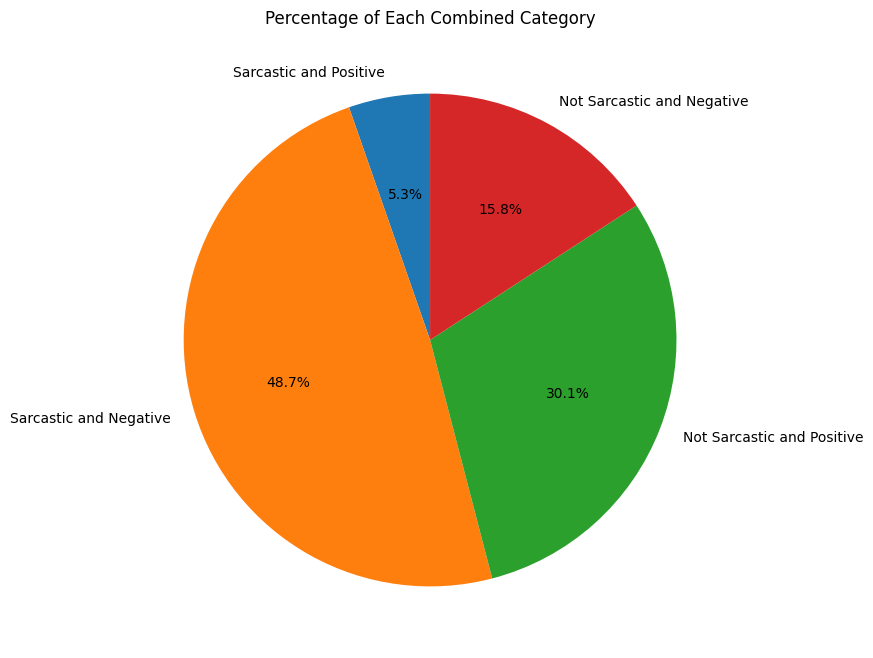

In [17]:
# calculating the percentages of different categories
# categories considered 1)positive_sarcastic 2)negative_sarcastic 3)positive_non_sarcastic 4)negative_non_sarcastic
# Calculate percentages
total_reviews = len(df)
sarcastic_positive_percentage = (df[(df['Sarcasm'] == 'sarcastic') & (df['Sentiment'] == 'positive')].shape[0] / total_reviews) * 100
sarcastic_negative_percentage = (df[(df['Sarcasm'] == 'sarcastic') & (df['Sentiment'] == 'negative')].shape[0] / total_reviews) * 100
non_sarcastic_positive_percentage = (df[(df['Sarcasm'] == 'not sarcastic') & (df['Sentiment'] == 'positive')].shape[0] / total_reviews) * 100
non_sarcastic_negative_percentage = (df[(df['Sarcasm'] == 'not sarcastic') & (df['Sentiment'] == 'negative')].shape[0] / total_reviews) * 100

# Print the percentages
print("Percentage of reviews:")
print(f"Sarcastic and Positive: {sarcastic_positive_percentage:.1f}%")
print(f"Sarcastic and Negative: {sarcastic_negative_percentage:.1f}%")
print(f"Not Sarcastic and Positive: {non_sarcastic_positive_percentage:.1f}%")
print(f"Not Sarcastic and Negative: {non_sarcastic_negative_percentage:.1f}%")

# Plot the pie chart
labels = ['Sarcastic and Positive', 'Sarcastic and Negative', 'Not Sarcastic and Positive', 'Not Sarcastic and Negative']
sizes = [sarcastic_positive_percentage, sarcastic_negative_percentage, non_sarcastic_positive_percentage, non_sarcastic_negative_percentage]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Combined Category')
plt.show()


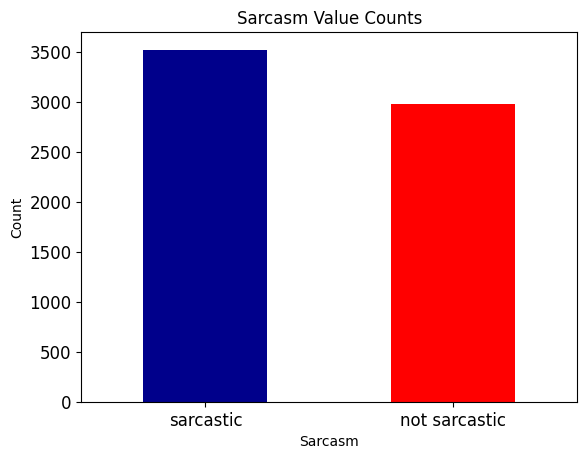

Sarcasm
sarcastic        3518
not sarcastic    2979
Name: count, dtype: int64

In [18]:
df['Sarcasm'].value_counts().plot(kind='bar', color=['darkblue', 'r'], rot=0, fontsize='large')
plt.title('Sarcasm Value Counts')
plt.xlabel('Sarcasm')
plt.ylabel('Count')
plt.show()
df['Sarcasm'].value_counts()

# **Data Processing**

## Data Processing Techniques in NLP

### Lemmatization
- **Purpose**: Reduces words to their base or root form to identify similarities.
- **Impact**: Enhances text analysis by standardizing words for accurate processing.

### Tokenization
- **Purpose**: Breaks text into tokens (words, phrases, symbols) for analysis.
- **Impact**: Enables efficient processing and analysis of text data.

### Encoding Techniques
- **Purpose**: Converts categorical data into numerical form for analysis.
- **Impact**: Facilitates the use of categorical data in machine learning models.


## **STEP-2) Lemmatization and Tokenization**

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [38]:
#nltk.download('all')

### **Lemmatization**

In [33]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['cleaned_data'] = df['cleaned_data'].apply(remove_stopwords)

lemmatizer = WordNetLemmatizer()

# Function to convert POS tag to a format recognized by the lemmatizer
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(sentence):
    words = sentence.split()
    pos_tags = pos_tag(words)
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags])


df['lemmatized_data'] = df['cleaned_data'].apply(lemmatization)


In [34]:
df

,Review,Sentiment,Sarcasm,cleaned_data,lemmatized_data
0,One of the other reviewers has mentioned that ...,positive,not sarcastic,One reviewers mentioned watching 1 Oz episode ...,One reviewer mention watch 1 Oz episode youll ...
1,A wonderful little production. <br /><br />The...,positive,not sarcastic,wonderful little production. filming technique...,wonderful little production. filming technique...
2,This movie was a groundbreaking experience!<br...,positive,sarcastic,movie groundbreaking experience! Ive never see...,movie groundbreaking experience! Ive never see...
3,I thought this was a wonderful way to spend ti...,positive,not sarcastic,thought wonderful way spend time hot summer we...,think wonderful way spend time hot summer week...
4,Basically there's a family where a little boy ...,negative,sarcastic,Basically theres family little boy Jake thinks...,Basically there family little boy Jake think t...
...,...,...,...,...,...
6539,This movie's idea of character development is ...,negative,sarcastic,movies idea character development muscles less...,movie idea character development muscle less b...
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic,guess ran budget decent script.,guess run budget decent script.
6541,Who needs a plot when you have explosions ever...,negative,sarcastic,needs plot explosions every five minutes?,need plot explosion every five minutes?
6542,Is there an award for most generic action movi...,negative,sarcastic,award generic action movie ever made?,award generic action movie ever made?


### **Tokenization**

In [39]:
# using the word tokenization technique
df['word_token']= df['lemmatized_data'].apply(word_tokenize)
df[['cleaned_data','lemmatized_data','word_token']]

,cleaned_data,lemmatized_data,word_token
0,One reviewers mentioned watching 1 Oz episode ...,One reviewer mention watch 1 Oz episode youll ...,"[One, reviewer, mention, watch, 1, Oz, episode..."
1,wonderful little production. filming technique...,wonderful little production. filming technique...,"[wonderful, little, production, ., filming, te..."
2,movie groundbreaking experience! Ive never see...,movie groundbreaking experience! Ive never see...,"[movie, groundbreaking, experience, !, Ive, ne..."
3,thought wonderful way spend time hot summer we...,think wonderful way spend time hot summer week...,"[think, wonderful, way, spend, time, hot, summ..."
4,Basically theres family little boy Jake thinks...,Basically there family little boy Jake think t...,"[Basically, there, family, little, boy, Jake, ..."
...,...,...,...
6539,movies idea character development muscles less...,movie idea character development muscle less b...,"[movie, idea, character, development, muscle, ..."
6540,guess ran budget decent script.,guess run budget decent script.,"[guess, run, budget, decent, script, .]"
6541,needs plot explosions every five minutes?,need plot explosion every five minutes?,"[need, plot, explosion, every, five, minutes, ?]"
6542,award generic action movie ever made?,award generic action movie ever made?,"[award, generic, action, movie, ever, made, ?]"


## Conclusion

### Word Tokenization

**Evaluation for `word_token`:**

- **Accuracy:** 0.83

- **Confusion Matrix:**
  - True Negatives (Not Sarcastic): 545
  - False Positives (Sarcastic): 59
  - False Negatives (Not Sarcastic): 160
  - True Positives (Sarcastic): 536

- **Classification Report:**
  - **Precision:**
    - Not Sarcastic: 0.77
    - Sarcastic: 0.90
  - **Recall:**
    - Not Sarcastic: 0.90
    - Sarcastic: 0.77
  - **F1-Score:**
    - Not Sarcastic: 0.83
    - Sarcastic: 0.83
  - **Support:**
    - Not Sarcastic: 604
    - Sarcastic: 696
  - **Accuracy:**
    - Overall: 0.83
  - **Macro Avg:**
    - Precision: 0.84
    - Recall: 0.84
    - F1-Score: 0.83
    - Support: 1300
  - **Weighted Avg:**
    - Precision: 0.84
    - Recall: 0.83
    - F1-Score: 0.83
    - Support: 1300

The `word_token` model achieved an accuracy of 83% in classifying text as sarcastic or not sarcastic. It showed balanced performance with similar F1-scores, precision, and recall for both classes. Overall, the model demonstrated good generalization on the evaluation dataset.


# **STEP - 3) Encoding**

### **a) Label Encoder**

In [41]:
from sklearn import preprocessing

In [42]:
#labels for sentiment column
label_encoder = preprocessing.LabelEncoder()

df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping of sentiment labels to numerical values:")
for sentiment, label in mapping.items():
    print(f"{sentiment}: {label}")

df['Sentiment']

Mapping of sentiment labels to numerical values:
negative: 0
neutral: 1
positive: 2


0       2
1       2
2       2
3       2
4       0
       ..
6539    0
6540    0
6541    0
6542    0
6543    0
Name: Sentiment, Length: 6497, dtype: int64

In [43]:
#labels for sarcasm column
label_encoder = preprocessing.LabelEncoder()

df['Sarcasm'] = label_encoder.fit_transform(df['Sarcasm'])

mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping of sarcasm labels to numerical values:")
for sarcasm, label in mapping.items():
    print(f"{sarcasm}: {label}")

df['Sarcasm']


Mapping of sarcasm labels to numerical values:
not sarcastic: 0
sarcastic: 1


0       0
1       0
2       1
3       0
4       1
       ..
6539    1
6540    1
6541    1
6542    1
6543    1
Name: Sarcasm, Length: 6497, dtype: int64

In [44]:
import pickle
from sklearn.model_selection import train_test_split

In [45]:
X=df['word_token']
Y=df['Sarcasm']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### **b) TF-IDF**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
def dummy(tokens):
    return tokens

def vectorizer_idf(reviews, vectorizer=None):
    vectorizer = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy)
    X = vectorizer.fit_transform(reviews)
    return X, vectorizer

vectorized_idf, vectorizer = vectorizer_idf(X_train)
X_train = list(vectorized_idf.toarray())

vectorized_test_idf = vectorizer.transform(X_test)
X_test = list(vectorized_test_idf.toarray())


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [54]:
df[['Review','cleaned_data','word_token','Sarcasm']]

,Review,cleaned_data,word_token,Sarcasm
0,One of the other reviewers has mentioned that ...,One reviewers mentioned watching 1 Oz episode ...,"[One, reviewer, mention, watch, 1, Oz, episode...",0
1,A wonderful little production. <br /><br />The...,wonderful little production. filming technique...,"[wonderful, little, production, ., filming, te...",0
2,This movie was a groundbreaking experience!<br...,movie groundbreaking experience! Ive never see...,"[movie, groundbreaking, experience, !, Ive, ne...",1
3,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,"[think, wonderful, way, spend, time, hot, summ...",0
4,Basically there's a family where a little boy ...,Basically theres family little boy Jake thinks...,"[Basically, there, family, little, boy, Jake, ...",1
...,...,...,...,...
6539,This movie's idea of character development is ...,movies idea character development muscles less...,"[movie, idea, character, development, muscle, ...",1
6540,I guess they ran out of budget for a decent sc...,guess ran budget decent script.,"[guess, run, budget, decent, script, .]",1
6541,Who needs a plot when you have explosions ever...,needs plot explosions every five minutes?,"[need, plot, explosion, every, five, minutes, ?]",1
6542,Is there an award for most generic action movi...,award generic action movie ever made?,"[award, generic, action, movie, ever, made, ?]",1


In [50]:
X_train

[array([0.        , 0.05351122, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.21684538, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.03325495, 0.09415754, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.06892208, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.       , 0.0572929, 0.       , ..., 0.       , 0.       ,
        0.       ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.08488518, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.13290313, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.12702929, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.10105056, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.14979673, 0.12118061, 0.        , ..., 0.        , 0.        ,


In [51]:
X_test

[array([0.       , 0.2736992, 0.       , ..., 0.       , 0.       ,
        0.       ]),
 array([0.        , 0.09661396, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.11570442, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.12025454, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.05633175, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.18677704, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.05553354, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.08339048, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.10312439, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.07308461, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.16555627, 0.21428729, 0.        , ..., 0.     

## Conclusion

The TF-IDF encoding method with the Random Forest model achieved the following evaluation metrics:

**Accuracy:** = 0.80
**Confusion Matrix:**
  True Positives (Sarcastic): 529
  True Negatives (Not Sarcastic): 509
  False Positives (Sarcastic): 95
  False Negatives (Not Sarcastic): 167
**Classification report:**
  - Precision:
    - Not Sarcastic: 0.75
    - Sarcastic: 0.85
  - Recall:
    - Not Sarcastic: 0.84
    - Sarcastic: 0.76
  - F1-Score:
    - Not Sarcastic: 0.80
    - Sarcastic: 0.80
  - Support:
    - Not Sarcastic: 604
    - Sarcastic: 696

The TF-IDF encoding method with the Random Forest model achieved an accuracy of 80% in classifying text as sarcastic or not sarcastic. The performance metrics, including precision, recall, and F1-score, were balanced across both classes.

This evaluation indicates that the TF-IDF encoding method provides better results compared to other encoding techniques.


# **Step - 4) Checking for Imbalance in the dataset**

In [56]:
def check_imbalance(df, label_column, threshold=0.05):
    label_counts = label_column.value_counts()
    class_proportions = label_counts / label_counts.sum()
    return any(class_proportions < threshold)

# Check imbalance
is_imbalanced = check_imbalance(X_train, y_train)
if is_imbalanced:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


The dataset is balanced.


# **STEP - 5) ML MODEL Training**

##**RANDOM FOREST ML MODEL**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


In [68]:
def test_single_input(model, input_vector):
    prediction = model.predict([input_vector])
    return prediction[0]

In [97]:
# Random Forest
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Evaluation for the given vectors:\n")
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)

    return model

model_rf=random_forest(X_train, X_test, y_train, y_test)

Evaluation for the given vectors:

Accuracy: 0.79
Confusion Matrix:
[[497 107]
 [167 529]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       604
           1       0.83      0.76      0.79       696

    accuracy                           0.79      1300
   macro avg       0.79      0.79      0.79      1300
weighted avg       0.79      0.79      0.79      1300



#**STEP - 6) Hyper paramter Tunning**


In [73]:
from sklearn.model_selection import GridSearchCV

In [94]:
X_t,_, y_t,_ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)


#hyper Parameters
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model_rf, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_t, y_t)
# Extract best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train,y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, rf_preds)
conf_matrix = confusion_matrix(y_test, rf_preds)
class_report = classification_report(y_test, rf_preds)

print(f"Evaluation for the given vectors:\n")
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Evaluation for the given vectors:

Accuracy: 0.83
Confusion Matrix:
[[545  59]
 [158 538]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       604
           1       0.90      0.77      0.83       696

    accuracy                           0.83      1300
   macro avg       0.84      0.84      0.83      1300
weighted avg       0.84      0.83      0.83      1300



##**conclusion**

### Model Tuning and Evaluation

The best parameters found for the Random Forest model were:
- `max_depth`: None
- `min_samples_leaf`: 1
- `min_samples_split`: 2
- `n_estimators`: 200

**Evaluation Metrics:**

- **Accuracy:** 0.83
- **Confusion Matrix:**
  - True Negatives (Not Sarcastic): 545
  - False Positives (Sarcastic): 59
  - False Negatives (Not Sarcastic): 158
  - True Positives (Sarcastic): 538
- **Classification Report:**
  - Precision: 0.78 (Not Sarcastic), 0.90 (Sarcastic)
  - Recall: 0.90 (Not Sarcastic), 0.77 (Sarcastic)
  - F1-Score: 0.83 (Both classes)
  - Support: 604 (Not Sarcastic), 696 (Sarcastic)

### Conclusion

The tuned Random Forest model achieved an accuracy of 83% in classifying text as sarcastic or not sarcastic. The model demonstrated balanced performance metrics across both classes, indicating its effectiveness and reliability for sarcasm detection tasks.


# **Analysis on the Evaluation matrix**

##**1) Accuracy Score:**
- It measures the ratio of correctly predicted instances to the total instances in the dataset.
- A high accuracy score (close to 1) generally indicates good model performance.
- Accuracy is a reliable metric when the classes are balanced.
##**2) Confusion Matrix:**
- It provides a detailed breakdown of correct and incorrect classifications beyond overall accuracy.
- The confusion matrix is structured into four categories: True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN).
  - True Positives (TP): Correctly predicted positive instances.
  - True Negatives (TN): Correctly predicted negative instances.
  - False Positives (FP): Incorrectly predicted positive instances (Type I error).
  - False Negatives (FN): Incorrectly predicted negative instances (Type II error).
- A good model will have high TP and TN values and low FP and FN values.
##**3) Classification Report:**
- It provides a detailed summary of the performance of a classification algorithm, including key metrics like precision, recall, F1-score, and support for each class.

- **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. It measures how accurate the model is in identifying relevant instances.

- **Recall (Sensitivity or True Positive Rate):** The ratio of correctly predicted positive observations to all observations in the actual class. It measures how well the model captures all relevant instances.

- **F1-Score:** The weighted average of precision and recall. It is especially useful when there is a need to balance precision and recall.

- **Support:** The number of actual occurrences of the class in the dataset. It helps understand the class distribution in the dataset.

- **Macro Average:** Computes the metric independently for each class and then takes the average, treating all classes equally regardless of their frequencies.

- **Weighted Average:** Computes the metric for each class and then takes the average, weighted by the number of instances for each class, reflecting the true distribution of the dataset.





